In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [269]:
train = pd.read_csv("../test/train.csv")
test = pd.read_csv("../test/test.csv")

train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [270]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [271]:
pd.isnull(train).sum() # 놓친 null 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

나이는 생존과 연관이 많기 때문에 Nan을 채워주고 
Cabin 너무 많이 데이터가 nan이기 때문에 drop 해준다

위의 describe에서 확인 할 수 있는건

성별과 나이, 가족여부, 클래스 차이에 따라 생존 확률이 나뉜것을 알 수 있다

여성생존 74.20382165605095
남성생존 18.890814558058924


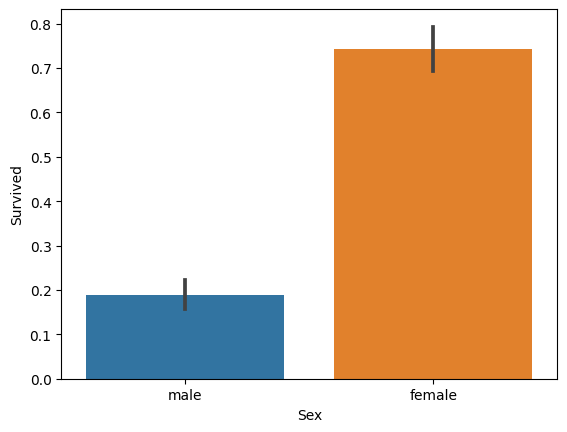

In [272]:
# 성별에 따른 생존
sns.barplot(x="Sex", y="Survived", data=train)

print("여성생존", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("남성생존",train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

퍼스트 승객 생존률: 62.96296296296296
비즈니스 승객 생존률: 47.28260869565217
이코노미 승객 생존률: 24.236252545824847


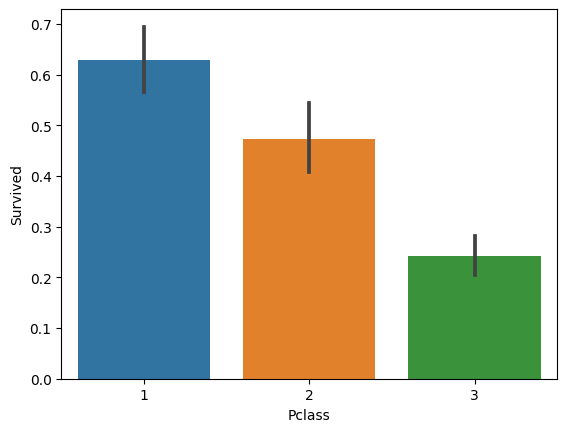

In [273]:
# 클래스에 따른 생존
#normalize 각 인덱스 별 값을 전부 합한후 전체 수로 나눠주는걸 하는 함수

sns.barplot(x= "Pclass", y="Survived", data = train)

print("퍼스트 승객 생존률:", train["Survived"][train["Pclass"]==1].value_counts(normalize=True)[1]*100)

print("비즈니스 승객 생존률:", train["Survived"][train["Pclass"]==2].value_counts(normalize=True)[1]*100)

print("이코노미 승객 생존률:", train["Survived"][train["Pclass"]==3].value_counts(normalize=True)[1]*100)

In [274]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


배후자 0명인 사람의 생존률: 34.53947368421053
배후자 1명인 사람의 생존률: 53.588516746411486
배후자 2명인 사람의 생존률: 46.42857142857143


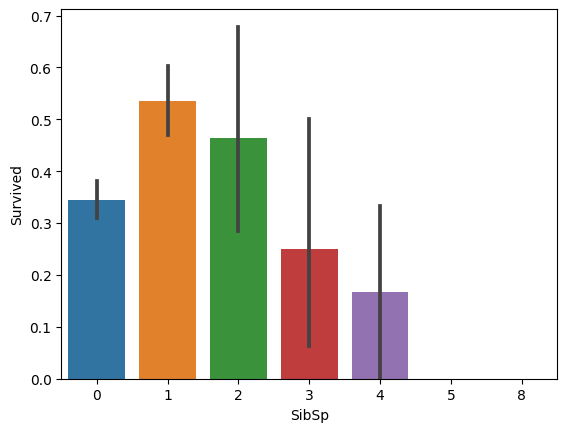

In [275]:
# 탑승한 승객의 배후자 수

sns.barplot(x= "SibSp", y="Survived", data = train)

print("배후자 0명인 사람의 생존률:", train["Survived"][train["SibSp"]==0].value_counts(normalize=True)[1]*100)

print("배후자 1명인 사람의 생존률:", train["Survived"][train["SibSp"]==1].value_counts(normalize=True)[1]*100)

print("배후자 2명인 사람의 생존률:", train["Survived"][train["SibSp"]==2].value_counts(normalize=True)[1]*100)

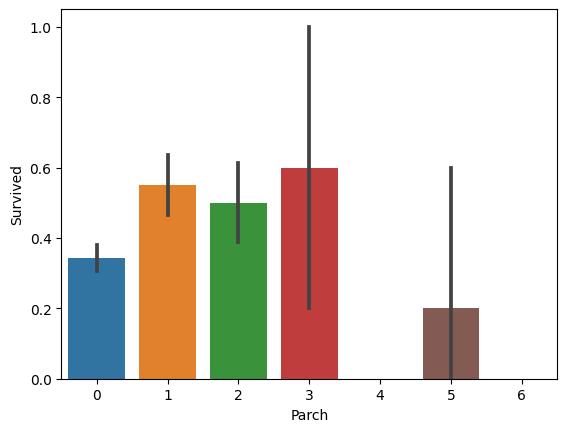

In [276]:
# 가족

sns.barplot(x="Parch", y="Survived", data=train)
plt.show()


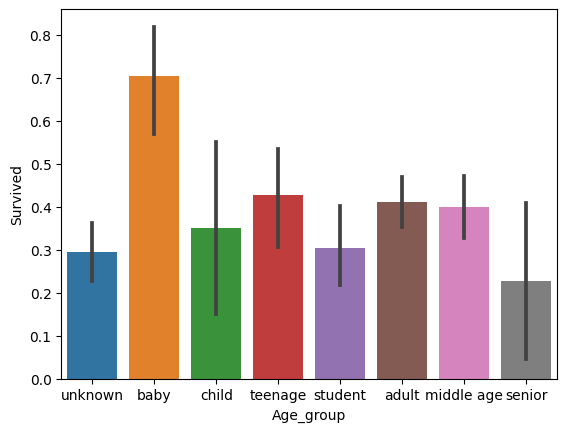

In [277]:
#filna 결측값을 대체한다

train["Age"] = train["Age"].fillna(-0.5)

test["Age"] = test["Age"].fillna(-0.5)

bins = [-1,0,5,10,18,22,35,60, np.inf]
labels = ['unknown', 'baby','child', 'teenage', 'student', 'adult','middle age','senior']
train['Age_group'] = pd.cut(train['Age'],bins,labels= labels)
test['Age_group'] = pd.cut(test['Age'],bins,labels=labels)

sns.barplot(x="Age_group",y="Survived", data=train)
plt.show()





선실에 있던 사람: 66.66666666666666
선실에 없던 사람: 29.985443959243085


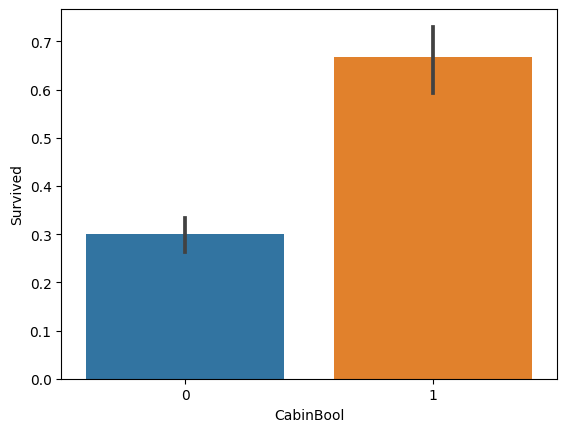

In [278]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

print("선실에 있던 사람:", train["Survived"][train["CabinBool"]==1].value_counts(normalize=True)[1]*100)

print("선실에 없던 사람:", train["Survived"][train["CabinBool"]==0].value_counts(normalize=True)[1]*100)

sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

In [279]:
train = train.drop(['Cabin'],axis =1)
test = test.drop(['Cabin'],axis =1)

In [280]:
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [281]:
train = train.drop(['Ticket'],axis =1)
test = test.drop(['Ticket'],axis =1)

In [282]:
train = train.fillna({"Embarked": "S"})

In [283]:
# 데이터가 같이 있는 콤바인 그룹을 생성
combine = [train, test]

#데이터에서 각 이름들에 앞 글자만 떼서 가지고 온다
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand =False)
    
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [284]:
# 앞에서 가져온 다양한 이름들을 통상 우리들이 사용하는 단어로 교체한다

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [285]:
#map 함수를 쓰기 위해 번호를 할당
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,middle age,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,adult,0,1


In [286]:
train["Age_group"]

0         student
1      middle age
2           adult
3           adult
4           adult
          ...    
886         adult
887       student
888       unknown
889         adult
890         adult
Name: Age_group, Length: 891, dtype: category
Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenage' < 'student' < 'adult' < 'middle age' < 'senior']

In [287]:
mr_age = train [train["Title"] == 1]["Age_group"].mode() # adult
miss_age = train[train["Title"] ==2]["Age_group"].mode() # student
mrs_age = train[train["Title"] ==3]["Age_group"].mode() #middle age
master_age = train[train["Title"]==4]["Age_group"].mode() #baby
royal_age = train[train["Title"]==5]["Age_group"].mode() # middle age
rare_age = train[train["Title"]==6]["Age_group"].mode() # middle age

age_title_mapping = {1:"adult", 2:"student", 3: "middle age", 4:"baby",
                      5: "middle age", 6: "senior"}

#각각 train과 test 그룹의 unknown을 maping해서 없애준 것

for i in range(len(train["Age_group"])):
    if train["Age_group"][i] == "unknown":
        train["Age_group"][i] = age_title_mapping[train["Title"][i]]
        
for i in range(len(test["Age_group"])):
    if test["Age_group"][i] == "unknown":
        test["Age_group"][i] = age_title_mapping[test["Title"][i]]

In [288]:
train['Age_group']

0         student
1      middle age
2           adult
3           adult
4           adult
          ...    
886         adult
887       student
888       student
889         adult
890         adult
Name: Age_group, Length: 891, dtype: category
Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenage' < 'student' < 'adult' < 'middle age' < 'senior']

In [289]:
age_mapping = {'baby':1, 'child':2, 'teenage':3, 'student':4,'adult':5,
               'middle age':6,'senior':7}
train["Age_group"] = train['Age_group'].map(age_mapping)
test["Age_group"] = test['Age_group'].map(age_mapping)

train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

In [290]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [291]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group,CabinBool,Title
0,1,0,3,male,1,0,7.2500,S,4.0,0,1
1,2,1,1,female,1,0,71.2833,C,6.0,1,3
2,3,1,3,female,0,0,7.9250,S,5.0,0,2
3,4,1,1,female,1,0,53.1000,S,5.0,1,3
4,5,0,3,male,0,0,8.0500,S,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,5.0,0,6
887,888,1,1,female,0,0,30.0000,S,4.0,1,2
888,889,0,3,female,1,2,23.4500,S,4.0,0,2
889,890,1,1,male,0,0,30.0000,C,5.0,1,1


In [292]:
sex_mapping = {"male":0, "female":1}

train['Sex'] = train["Sex"].map(sex_mapping)
test['Sex'] = test["Sex"].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [293]:
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [294]:
# embarked mapping

embarked_mapping = {"S":1, "C":2, "Q":3 }

train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] =test["Embarked"].map(embarked_mapping)

train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,13.0000,1,5.0,0,6
887,888,1,1,1,0,0,30.0000,1,4.0,1,2
888,889,0,3,1,1,2,23.4500,1,4.0,0,2
889,890,1,1,0,0,0,30.0000,2,5.0,1,1


In [295]:
for i in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][i]):
        pclass =test["Pclass"][i]
        test["Fare"][i] = round(train[train["Pclass"] == pclass]["Fare"].mean(),4)
        
train["FareBand"] = pd.qcut(train['Fare'], 4, labels=[1,2,3,4])
test["FareBand"] = pd.qcut(test['Fare'],4 ,labels=[1,2,3,4])


# 이전해줬던 값을 버려준다
train =train.drop(['Fare'],axis = 1)
test =test.drop(['Fare'],axis = 1)

In [296]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_group,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [297]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_group,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


### 모델 구하기

In [298]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis =1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state =0)

### Gaussian Naive Bayes

    - 정규분포를 따른다고 가정하고 정규분포에서의 확률밀도 계산 식으로 구하는 방식

In [299]:
# 가우시안 Naitive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val)*100,2)

acc_gaussian

78.68

### Logistic Regression

    - 분류 및 예측 분석에 사용된다

In [300]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred,y_val)*100,2)
acc_logreg


79.19

### Support Vector Machines

    - 패턴 인식, 자료 분석을 위한 지도 학습 모델이며, 주로 분류와 회귀 분석을 위해 사용한다

In [301]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val)*100,2)
acc_svc

81.73

### Linear SVC

    -

In [302]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val)*100,2)
acc_linear_svc

77.66

### Perceptron

    - 다수의 신호를 입력받아서 하나의 신호를 출력하는 알고리즘

In [303]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val)*100,2)
acc_perceptron

78.68

### Decision Tree

    - 의사결정 나무는 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타낸다

In [304]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val)*100,2)
acc_decisiontree

79.19

### Random Forest

    - 과대적합(overfiting)을 방지하기 위해 최적의 기준 변수를 랜덤으로 선택하는 머신러닝 기법

In [305]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

81.73


### KNN or K-Nearest Neighbors(K-최근접 이웃)

    -유사한 특성을 가진 데이터는 유사한 범주에 속하는 경향이 있다고 가정하며 사용

In [306]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

82.74


### Stochastic Gradient Descent(확률적 경사 하강법)

    - 추출된 데이터 한개에 대해서 경사(gradient)를 계산하고 경사 하강 알고리즘을 적용하는 방법을 말한다

In [307]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

79.7


### Gradient Boosting Classifier

    - 머신러닝 앙상블 기법 중 하나
    - 약한 학습기를 순차적으로 학습시키고 예측을 하면서 잘못 예측한 데이터에 가중치(w)를 부여해서 성능이 높아진 강한 학습기를 만드는 알고리즘

In [308]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.26


In [310]:
models = pd.DataFrame({
    'Model' : ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.26
1,KNN,82.74
0,Support Vector Machines,81.73
3,Random Forest,81.73
8,Stochastic Gradient Descent,79.70
2,Logistic Regression,79.19
7,Decision Tree,79.19
4,Naive Bayes,78.68
5,Perceptron,78.68
6,Linear SVC,77.66


In [311]:
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId': ids, 'Survived' : predictions})
output.to_csv('submission.csv', index=False)